In [2]:
import os
import glob
import pickle

In [3]:
# (1) 프로젝트 루트나 절대경로에 맞추어 수정하세요.
base_dir = os.path.expanduser('/root/Comp_neuro_final')  

# (2) cfg["logging"]["gate_alpha_dir"]와 동일한 위치
gate_alpha_dir = os.path.join(base_dir, 'results', 'gate_alpha')
terminated_dir = os.path.join(base_dir, 'results', 'terminated')

In [4]:
# *.pkl 패턴을 이용해, 에피소드별로 저장된 파일을 전부 가져옵니다.
gate_alpha_pattern = os.path.join(gate_alpha_dir, 'gate_alpha_*_ep*.pkl')
terminated_pattern  = os.path.join(terminated_dir, 'terminated_*_ep*.pkl')

gate_alpha_files = sorted(glob.glob(gate_alpha_pattern))
terminated_files  = sorted(glob.glob(terminated_pattern))

print("▶ gate_alpha 파일 개수:", len(gate_alpha_files))
print("▶ terminated 파일 개수: ", len(terminated_files))

▶ gate_alpha 파일 개수: 976
▶ terminated 파일 개수:  976


In [5]:
def episode_index_from_filename(filepath: str) -> int:
    """
    filepath가 '.../gate_alpha_A2C_ep12.pkl' 같은 형태라면, 
    뒤에서 'ep12' 부분을 파싱하여 정수 12를 반환합니다.
    """
    fname = os.path.basename(filepath)  # ex) 'gate_alpha_A2C_ep12.pkl'
    # 'ep' 뒤에 숫자가 오므로, 'ep' 위치를 찾아 인덱스를 뽑아냅니다.
    # (더 견고하게 하고 싶다면 정규표현식 re.search(r'_ep(\d+)\.pkl$', fname)을 써도 됩니다.)
    try:
        # 언더바(_)를 기준으로 split → ['gate', 'alpha', 'A2C', 'ep12.pkl'] 형태가 될 수도 있지만
        # 뒤에서 'ep'를 찾는 것이 더 확실합니다.
        ep_part = fname.split('_')[-1]     # 'ep12.pkl'
        ep_num = int(ep_part.replace('ep', '').replace('.pkl', ''))
        return ep_num
    except:
        # 파싱에 실패했으면 기본적으로 0을 리턴
        return 0

# 정렬을 “에피소드 순”으로 다시 재정렬
gate_alpha_files = sorted(
    gate_alpha_files, 
    key=lambda fp: episode_index_from_filename(fp)
)
terminated_files = sorted(
    terminated_files, 
    key=lambda fp: episode_index_from_filename(fp)
)

# 파일명이 올바르게 에피소드 순(1,2,3,...)으로 나열됐는지 출력해 봅니다.
print("\n-- 정렬된 gate_alpha 파일 리스트 (앞 5개) --")
for fp in gate_alpha_files[:5]:
    print("   ", os.path.basename(fp))
print("\n-- 정렬된 terminated 파일 리스트 (앞 5개) --")
for fp in terminated_files[:5]:
    print("   ", os.path.basename(fp))


-- 정렬된 gate_alpha 파일 리스트 (앞 5개) --
    gate_alpha_A2C_ep1.pkl
    gate_alpha_A2C_ep2.pkl
    gate_alpha_A2C_ep3.pkl
    gate_alpha_A2C_ep4.pkl
    gate_alpha_A2C_ep5.pkl

-- 정렬된 terminated 파일 리스트 (앞 5개) --
    terminated_A2C_ep1.pkl
    terminated_A2C_ep2.pkl
    terminated_A2C_ep3.pkl
    terminated_A2C_ep4.pkl
    terminated_A2C_ep5.pkl


In [6]:

# ─────────────────────────────────────────────────────────────
# 4) pickle.load로 Python 리스트로 불러온 뒤, 리스트의 리스트로 저장
# ─────────────────────────────────────────────────────────────
all_gate_alpha = []  # type: List[List[float]]  # 에피소드별 gate_alpha 리스트가 들어감
all_terminated  = []  # type: List[List[int]]    # 에피소드별 terminated 리스트가 들어감

# 4-1) gate_alpha 불러오기
for filepath in gate_alpha_files:
    with open(filepath, 'rb') as f:
        gate_list = pickle.load(f)
        # gate_list: Python list of floats, ex) [0.12, 0.15, 0.08, ...]
    all_gate_alpha.append(gate_list)

# 4-2) terminated 불러오기
for filepath in terminated_files:
    with open(filepath, 'rb') as f:
        term_list = pickle.load(f)
        # term_list: Python list of booleans or ints(ex: [False, False, True], 혹은 [0, 0, 1])
        # 필요하다면 int(True) → 1, int(False) → 0 으로 바꿀 수도 있음
        term_list = [int(t) for t in term_list]
    all_terminated.append(term_list)

# 저장 결과 확인 (디버깅용)
print("▶ 에피소드별 gate_alpha 수: ", [len(x) for x in all_gate_alpha][:5], "...")
print("▶ 에피소드별 terminated 수:  ", [len(x) for x in all_terminated][:5], "...")


▶ 에피소드별 gate_alpha 수:  [1000, 1000, 630, 1000, 1000] ...
▶ 에피소드별 terminated 수:   [1000, 1000, 630, 1000, 1000] ...


/tmp/ipykernel_207276/1384776666.py:41: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/1384776666.py:41: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/1384776666.py:41: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/root/miniconda3/envs/final_project_gpu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/final_project_gpu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/final_project_gpu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserW

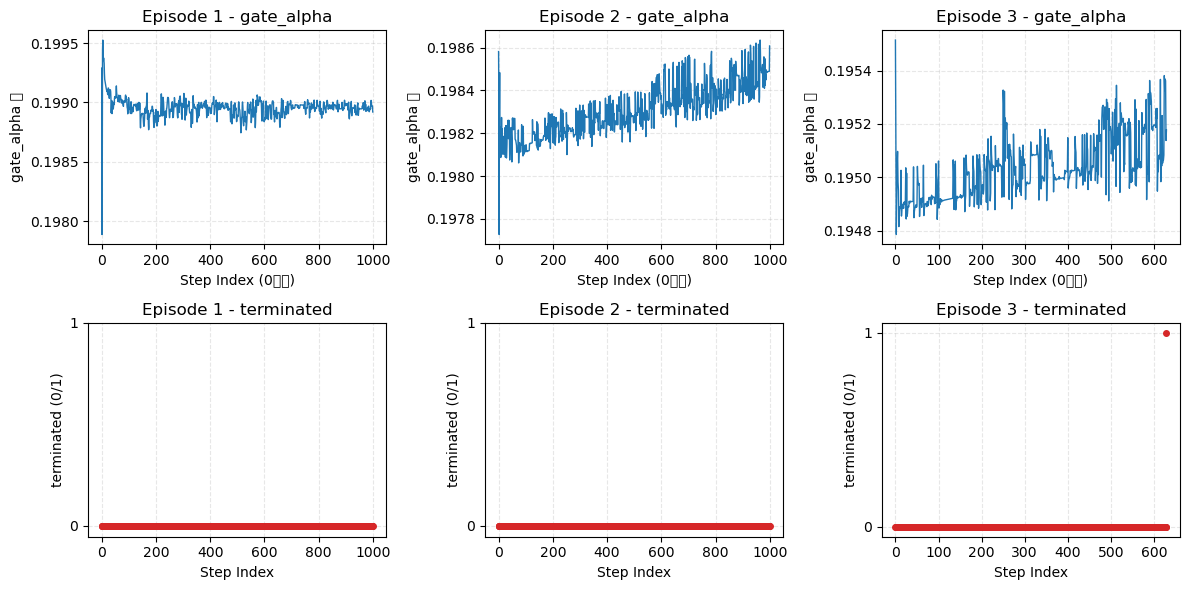

In [7]:
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────
# (A) 화면에 띄울 에피소드 개수 & 인덱스 설정
# ─────────────────────────────────────────────────────────────
# 예시로, 처음 3개 에피소드만 보여 주고 싶다면:
plot_episodes = [0, 1, 2]  # 0-based index (즉, 에피소드 1, 2, 3)

# ─────────────────────────────────────────────────────────────
# (B) 2행 X len(plot_episodes)열 그리드 생성
# ─────────────────────────────────────────────────────────────
num_plots = len(plot_episodes)
fig, axes = plt.subplots(2, num_plots, figsize=(4*num_plots, 6))

for idx, ep_idx in enumerate(plot_episodes):
    # ─────────────────────────────────────────────────────────
    # (B-1) gate_alpha 그리기 (상단)
    # ─────────────────────────────────────────────────────────
    ax_gate = axes[0, idx]  
    gate_data = all_gate_alpha[ep_idx]  # ex) [0.14, 0.10, 0.22, …]
    ax_gate.plot(gate_data, linewidth=1.0)
    ax_gate.set_title(f'Episode {ep_idx+1} - gate_alpha')
    ax_gate.set_ylabel('gate_alpha 값')
    ax_gate.set_xlabel('Step Index (0부터)')
    ax_gate.grid(True, linestyle='--', alpha=0.3)

    # ─────────────────────────────────────────────────────────
    # (B-2) terminated 그리기 (하단)
    # ─────────────────────────────────────────────────────────
    ax_term = axes[1, idx]
    term_data = all_terminated[ep_idx]  # ex) [0, 0, 1]
    # linestyle='None' + marker='o'를 이용해 “0/1 위치에만 점”을 찍습니다.
    ax_term.plot(term_data, linestyle='None', marker='o', color='tab:red', markersize=4)
    ax_term.set_title(f'Episode {ep_idx+1} - terminated')
    ax_term.set_ylabel('terminated (0/1)')
    ax_term.set_xlabel('Step Index')
    ax_term.set_yticks([0, 1])
    ax_term.grid(True, linestyle='--', alpha=0.3)

# 레이아웃 겹침 방지
plt.tight_layout()
plt.show()


/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_207276/49361315.py:91: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  plt.tight_layou

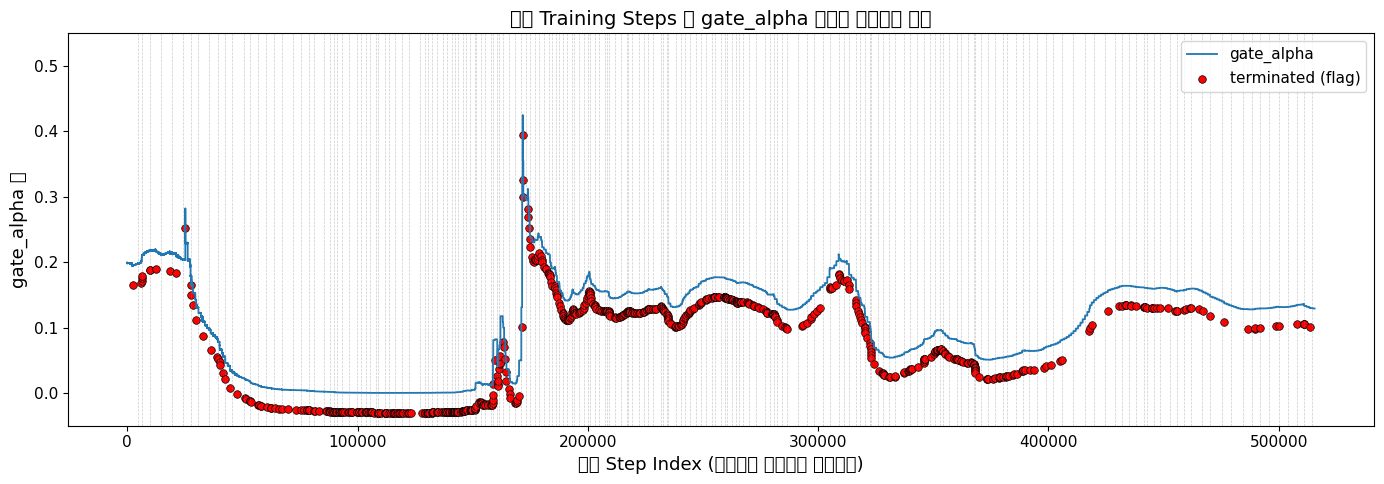

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터: all_gate_alpha, all_terminated
# ───────────────────────────────────────────────────────────
# 예시 (실제로는 pickle로 불러온 리스트의 리스트)
# all_gate_alpha = [ [ep1_step0, ep1_step1, …], [ep2_step0, …], … ]
# all_terminated  = [ [0, 0, …, 1],    [0, …, 1], … ]

# ───────────────────────────────────────────────────────────
# (B) 모든 에피소드를 한 번에 이어붙인 1D 벡터 생성
# ───────────────────────────────────────────────────────────
gate_flat = np.concatenate(all_gate_alpha)
term_flat = np.concatenate(all_terminated)

# ───────────────────────────────────────────────────────────
# (C) 각 에피소드의 길이 → 누적합(에피소드 경계 인덱스)
# ───────────────────────────────────────────────────────────
episode_lengths   = [len(ep) for ep in all_terminated]
cumulative_steps  = np.cumsum(episode_lengths)  # 예: array([50, 115, 180, …])

# ───────────────────────────────────────────────────────────
# (D) Matplotlib 옵션 설정
# ───────────────────────────────────────────────────────────
plt.rcParams['figure.dpi']        = 100
plt.rcParams['font.size']         = 12
plt.rcParams['axes.titlesize']    = 14
plt.rcParams['axes.labelsize']    = 13
plt.rcParams['xtick.labelsize']   = 11
plt.rcParams['ytick.labelsize']   = 11

fig, ax = plt.subplots(figsize=(14, 5))

# ───────────────────────────────────────────────────────────
# 1) gate_alpha 전체 라인 그리기 (파란 실선, linewidth=1.3)
# ───────────────────────────────────────────────────────────
ax.plot(gate_flat,
        linewidth=1.3,
        label='gate_alpha')  # 디폴트 컬러(파란)

# ───────────────────────────────────────────────────────────
# 2) 에피소드 경계선(episode boundary) 얇고 연한 점선으로 그리기
#    → 너무 많은 선이 그려지면 복잡하니, “매 5번째 에피소드”만 표시
# ───────────────────────────────────────────────────────────
for idx, boundary in enumerate(cumulative_steps):
    # idx는 0-based 인덱스이므로 실제 에피소드는 idx+1
    if (idx + 1) % 5 == 0:
        ax.axvline(x=boundary - 1,
                   color='gray',
                   linestyle='--',
                   linewidth=0.5,
                   alpha=0.4)

# ───────────────────────────────────────────────────────────
# 3) terminated 플래그 그리기 (빨간 점으로, marker edgecolor 강조)
# ───────────────────────────────────────────────────────────
term_indices = np.where(term_flat == 1)[0]
# gate_flat[term_indices] 위치보다 살짝 아래에 점을 찍어 구분
y_offset = gate_flat[term_indices] - 0.03

ax.scatter(term_indices,
           y_offset,
           color='red',
           edgecolors='black',
           linewidths=0.5,
           s=30,
           label='terminated (flag)')

# ───────────────────────────────────────────────────────────
# 4) 축 레이블, 제목, 범례 추가
# ───────────────────────────────────────────────────────────
ax.set_title('전체 Training Steps 중 gate_alpha 변화와 에피소드 경계')
ax.set_xlabel('전체 Step Index (에피소드 순서대로 이어붙임)')
ax.set_ylabel('gate_alpha 값')

ax.legend(loc='upper right', fontsize=11)

# ───────────────────────────────────────────────────────────
# (격자 제거): 아래 줄을 삭제하거나 주석 처리하세요.
# ───────────────────────────────────────────────────────────
# ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

# ───────────────────────────────────────────────────────────
# 5) y축 범위 약간 여유 있게 설정 (원하는 범위로 조정 가능)
# ───────────────────────────────────────────────────────────
min_val = min(gate_flat.min(), 0.0)
max_val = max(gate_flat.max(), 0.5)
ax.set_ylim(min_val - 0.05, max_val + 0.05)

plt.tight_layout()
plt.show()


Number of episodes: 976, Maximum episode length: 1000


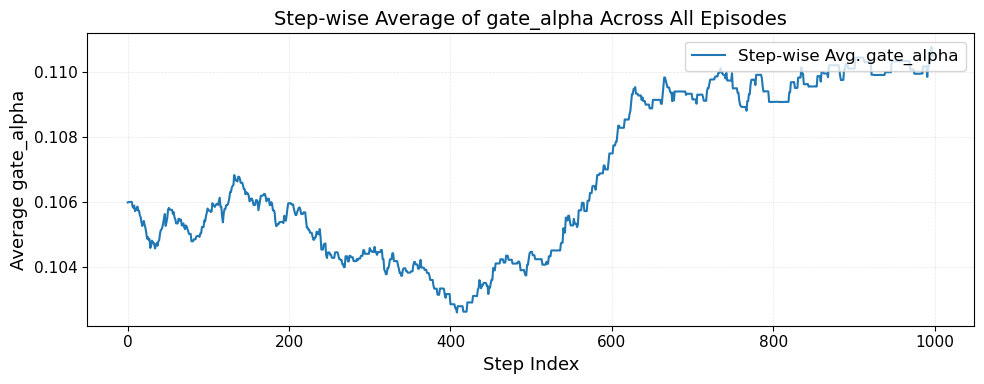

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터 (예시):
#    all_gate_alpha = [
#        [ep1_step0, ep1_step1, …],    # 에피소드 1의 gate_alpha 리스트
#        [ep2_step0, ep2_step1, ep2_step2, …],  # 에피소드 2
#        …
#    ]
# ───────────────────────────────────────────────────────────────────

# 예시 데이터를 간단히 만들어보면 (실제로는 pickle로 읽어온 real data):
# all_gate_alpha = [
#     [0.2, 0.15, 0.1, 0.05],      # Episode 1 (4 steps)
#     [0.22, 0.18, 0.12],          # Episode 2 (3 steps)
#     [0.19, 0.16, 0.11, 0.07, 0.05],  # Episode 3 (5 steps)
#     …
# ]

# ───────────────────────────────────────────────────────────────────
# 1) Find the longest episode length
# ───────────────────────────────────────────────────────────────────
episode_lengths = [len(ep) for ep in all_gate_alpha]
max_len = max(episode_lengths)
num_episodes = len(all_gate_alpha)

print(f"Number of episodes: {num_episodes}, Maximum episode length: {max_len}")

# ───────────────────────────────────────────────────────────────────
# 2) Create a 2D array (num_episodes × max_len) and fill with NaN
#    → later we’ll use np.nanmean, so “missing steps” remain NaN
# ───────────────────────────────────────────────────────────────────
gate_matrix = np.full((num_episodes, max_len), np.nan, dtype=np.float32)

# ───────────────────────────────────────────────────────────────────
# 3) Copy each episode’s gate_alpha into its corresponding row
# ───────────────────────────────────────────────────────────────────
for i, ep_values in enumerate(all_gate_alpha):
    length_i = len(ep_values)
    gate_matrix[i, :length_i] = ep_values

# ───────────────────────────────────────────────────────────────────
# 4) Compute step-wise average (axis=0, ignoring NaN)
# ───────────────────────────────────────────────────────────────────
#    gate_matrix.shape == (num_episodes, max_len)
#    mean_gate_per_step[j] = np.nanmean(gate_matrix[:, j])
mean_gate_per_step = np.nanmean(gate_matrix, axis=0)  # shape = (max_len,)

# ───────────────────────────────────────────────────────────────────
# 5) Optionally, count how many episodes contributed to each step
#    → useful for debugging or confidence intervals
# ───────────────────────────────────────────────────────────────────
#    valid_counts[j] = number of non-NaN entries in gate_matrix[:, j]
valid_counts = np.sum(~np.isnan(gate_matrix), axis=0)  # shape = (max_len,)

#   (Optional) If you want the variance at each step:
#   var_gate_per_step = np.nanvar(gate_matrix, axis=0)

# ───────────────────────────────────────────────────────────────────
# 6) Plot: step-wise average curve with English labels
# ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 4))
x_axis = np.arange(max_len)  # 0, 1, 2, …, max_len-1

plt.plot(
    x_axis,
    mean_gate_per_step,
    color='tab:blue',
    linewidth=1.5,
    label='Step-wise Avg. gate_alpha'
)

# (Optional) If you want to show how many episodes contributed to each step,
# you can uncomment the block below and adjust as needed:
#
# fig, ax1 = plt.subplots(figsize=(10, 4))
# ax1.plot(
#     x_axis,
#     mean_gate_per_step,
#     color='tab:blue',
#     linewidth=1.5,
#     label='Step-wise Avg. gate_alpha'
# )
# ax1.set_ylabel('Average gate_alpha')
#
# ax2 = ax1.twinx()
# ax2.bar(
#     x_axis,
#     valid_counts,
#     color='tab:gray',
#     alpha=0.3,
#     label='Number of Valid Episodes'
# )
# ax2.set_ylabel('Valid Episode Count')

plt.xlabel('Step Index')
plt.ylabel('Average gate_alpha')
plt.title('Step-wise Average of gate_alpha Across All Episodes')
plt.legend(loc='upper right')
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [15]:
len(all_terminated[0])

1000

Success per episode: [0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1

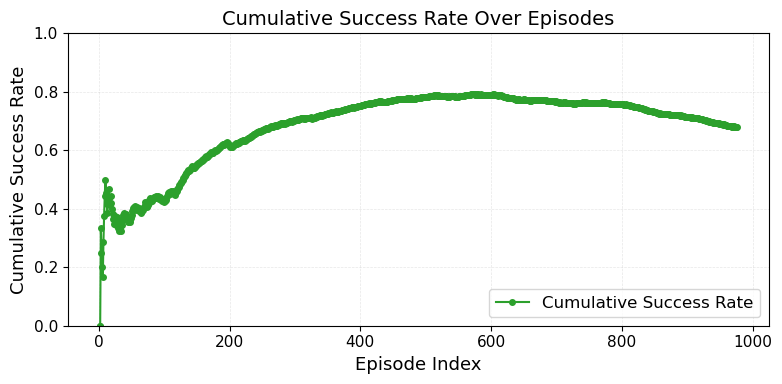

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터:
#    all_terminated = [
#        [0, 0, …, 1],   # Episode 1의 terminated 리스트 (0 또는 1)
#        [0, 0, 1],      # Episode 2
#        …
#    ]
#    각 리스트에서 “1”이 한 번이라도 등장하면 그 에피소드는 성공했다고 가정
# ───────────────────────────────────────────────────────────────────

# ───────────────────────────────────────────────────────────────────
# 1) 에피소드별 ‘성공 여부’ 계산
#    – success_per_ep[i] = 1 if episode i had any terminated==1, else 0
# ───────────────────────────────────────────────────────────────────
success_per_ep = np.array([1 if np.any(ep) else 0 for ep in all_terminated])
# 예시 출력
print("Success per episode:", success_per_ep)

# ───────────────────────────────────────────────────────────────────
# 2) 누적 성공률 (cumulative success rate) 계산
#    – cum_success[i] = (sum of success_per_ep[:i+1]) / (i+1)
# ───────────────────────────────────────────────────────────────────
episode_indices = np.arange(1, len(success_per_ep) + 1)  # 1부터 시작
cumulative_success_rate = np.cumsum(success_per_ep) / episode_indices

# ───────────────────────────────────────────────────────────────────
# 3) 시각화: episode index별 누적 성공률 곡선
# ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(8, 4))
plt.plot(
    episode_indices,
    cumulative_success_rate,
    color='tab:green',
    linewidth=1.5,
    marker='o',
    markersize=4,
    label='Cumulative Success Rate'
)

plt.xlabel('Episode Index')
plt.ylabel('Cumulative Success Rate')
plt.title('Cumulative Success Rate Over Episodes')
plt.ylim(0, 1.0)  # 성공률은 0~1 사이
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


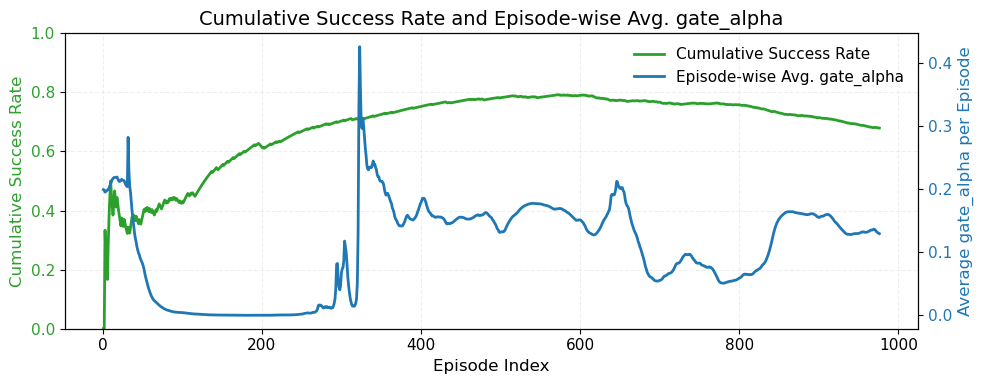

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터:
#    all_gate_alpha = [
#        [ep1_step0, ep1_step1, …],    # Episode 1의 gate_alpha 리스트
#        [ep2_step0, ep2_step1, ep2_step2, …],  # Episode 2
#        …
#    ]
#    all_terminated = [
#        [0, 0, …, 1],   # Episode 1의 terminated 리스트 (0 또는 1)
#        [0, 0, 1],      # Episode 2
#        …
#    ]
# ───────────────────────────────────────────────────────────────────

# ───────────────────────────────────────────────────────────────────
# 1) 에피소드별 ‘성공 여부’ 계산
#    → success_per_ep[i] = 1 if 그 에피소드에 terminated==1이 하나라도 있으면 1, 아니면 0
# ───────────────────────────────────────────────────────────────────
success_per_ep = np.array([1 if np.any(ep) else 0 for ep in all_terminated])

# ───────────────────────────────────────────────────────────────────
# 2) 누적 성공률 (cumulative success rate) 계산
#    → cum_success[i] = (sum(success_per_ep[:i+1])) / (i+1)
# ───────────────────────────────────────────────────────────────────
episode_indices = np.arange(1, len(success_per_ep) + 1)  # 1부터 시작
cumulative_success_rate = np.cumsum(success_per_ep) / episode_indices

# ───────────────────────────────────────────────────────────────────
# 3) 에피소드별 평균 gate_alpha 계산
#    → avg_alpha_per_ep[i] = np.mean(all_gate_alpha[i])
# ───────────────────────────────────────────────────────────────────
avg_alpha_per_ep = np.array([np.mean(ep) for ep in all_gate_alpha])

# ───────────────────────────────────────────────────────────────────
# 4) 시각화: 
#    - 왼쪽 y축: cumulative success rate (green 실선)
#    - 오른쪽 y축: episode-wise average alpha (blue 실선)
#    - 모두 **선(line) 그래프**로 그리기 (마커 없음)
# ───────────────────────────────────────────────────────────────────
fig, ax1 = plt.subplots(figsize=(10, 4))

# 왼쪽 y축: cumulative success rate
ax1.plot(
    episode_indices,
    cumulative_success_rate,
    color='tab:green',
    linewidth=2.0,
    linestyle='-',
    label='Cumulative Success Rate'
)
ax1.set_xlabel('Episode Index', fontsize=12)
ax1.set_ylabel('Cumulative Success Rate', color='tab:green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:green', labelsize=11)
ax1.set_ylim(0, 1.0)

# 오른쪽 y축: average gate_alpha per episode
ax2 = ax1.twinx()
ax2.plot(
    episode_indices,
    avg_alpha_per_ep,
    color='tab:blue',
    linewidth=2.0,
    linestyle='-',
    label='Episode-wise Avg. gate_alpha'
)
ax2.set_ylabel('Average gate_alpha per Episode', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=11)

# 범례 설정: 두 축의 모든 선을 하나로 합쳐서 표시
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2, 
    labels_1 + labels_2, 
    loc='upper right', 
    fontsize=11,
    frameon=False
)

# 제목 및 격자 설정
plt.title('Cumulative Success Rate and Episode-wise Avg. gate_alpha', fontsize=14)
ax1.grid(alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()


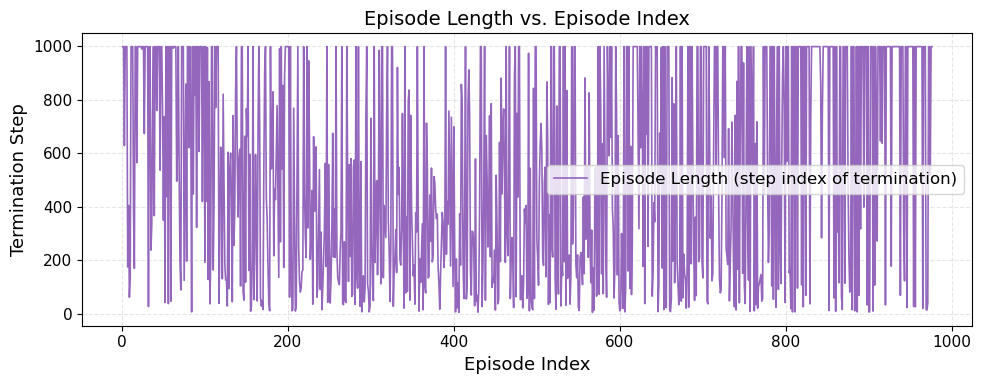

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) all_terminated: 
#    각 에피소드별 terminated 리스트 (0/0/…/1 형태)
#    예를 들어 [0, 0, 1] 형태라면, 종료 스텝은 인덱스 2
# ───────────────────────────────────────────────────────────────────

# 1) 각 에피소드별 종료 스텝 구하기 (terminated == 1인 첫 인덱스)
episode_lengths = []  # terminated 리스트를 이용해 종료 스텝 인덱스 계산
for term_list in all_terminated:
    if np.any(term_list):
        # terminated == 1인 첫 번째 위치(인덱스)를 종료 스텝으로 간주
        end_step = int(np.argmax(term_list))
    else:
        # 만약 terminated==1이 없는 에피소드(끝까지 실패 없었다면),
        # 리스트 길이 - 1 을 종료 스텝으로 간주하거나, 그냥 전체 길이로 간주
        end_step = len(term_list) - 1
    episode_lengths.append(end_step)

# 2) 시각화: 에피소드 인덱스 대비 종료 스텝 추이
plt.figure(figsize=(10, 4))
plt.plot(
    np.arange(1, len(episode_lengths)+1),
    episode_lengths,
    color='tab:purple',
    linewidth=1.2,
    label='Episode Length (step index of termination)'
)
plt.xlabel('Episode Index')
plt.ylabel('Termination Step')
plt.title('Episode Length vs. Episode Index')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


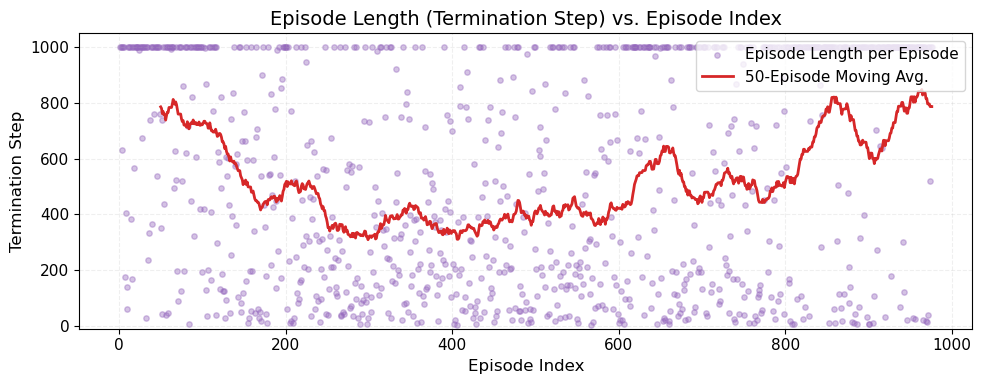

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터:
#     episode_lengths = [length_ep1, length_ep2, ..., length_epN]
#     (length_epi는 i번째 에피소드가 terminated == 1을 처음 기록한 스텝 인덱스)
# ───────────────────────────────────────────────────────────────────

# (B) 예시: 만약 직접 계산하지 않았다면, 아래처럼 all_terminated를 이용해 만든다고 가정
# episode_lengths = []
# for term_list in all_terminated:
#     if np.any(term_list):
#         end_step = int(np.argmax(term_list))
#     else:
#         end_step = len(term_list) - 1
#     episode_lengths.append(end_step)

episode_lengths = np.array(episode_lengths)  # numpy array로 변환

# ───────────────────────────────────────────────────────────────────
# (1) 산점도(Scatter)로 에피소드별 “termination step” 점 찍기
# ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.scatter(
    np.arange(1, len(episode_lengths) + 1),  # x: Episode Index (1-based)
    episode_lengths,                          # y: 종료 스텝 인덱스
    s=15,                                     # 마커 크기 (작게)
    color='tab:purple',
    alpha=0.4,                                # 투명도 주기
    label='Episode Length per Episode'
)

# ───────────────────────────────────────────────────────────────────
# (2) 50-episode 이동평균(Moving Average) 계산 및 그리기
#     → smoothing window_size를 변경하면 추세가 더 부드러워지거나 세밀해짐
# ───────────────────────────────────────────────────────────────────
window_size = 50
if len(episode_lengths) >= window_size:
    # 이동평균을 구하려면, np.convolve를 이용
    weights = np.ones(window_size) / window_size
    ma = np.convolve(episode_lengths, weights, mode='valid')
    # 이동평균의 x축 위치 (처음 window_size 에피소드 이후부터 유효)
    ma_x = np.arange(window_size, len(episode_lengths) + 1)
    plt.plot(
        ma_x,
        ma,
        color='tab:red',
        linewidth=2.0,
        label=f'{window_size}-Episode Moving Avg.'
    )

# ───────────────────────────────────────────────────────────────────
# (3) 축 레이블/제목/범례/격자 등 설정
# ───────────────────────────────────────────────────────────────────
plt.xlabel('Episode Index', fontsize=12)
plt.ylabel('Termination Step', fontsize=12)
plt.title('Episode Length (Termination Step) vs. Episode Index', fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.grid(alpha=0.2, linestyle='--')

# (4) y축 범위 설정 (원한다면 최대 스텝 수보다 조금 여유 있게)
max_step = np.nanmax(episode_lengths)
plt.ylim(-10, max_step + 50)  # -10부터 최대 스텝+50까지

plt.tight_layout()
plt.show()


/tmp/ipykernel_207276/2753705554.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


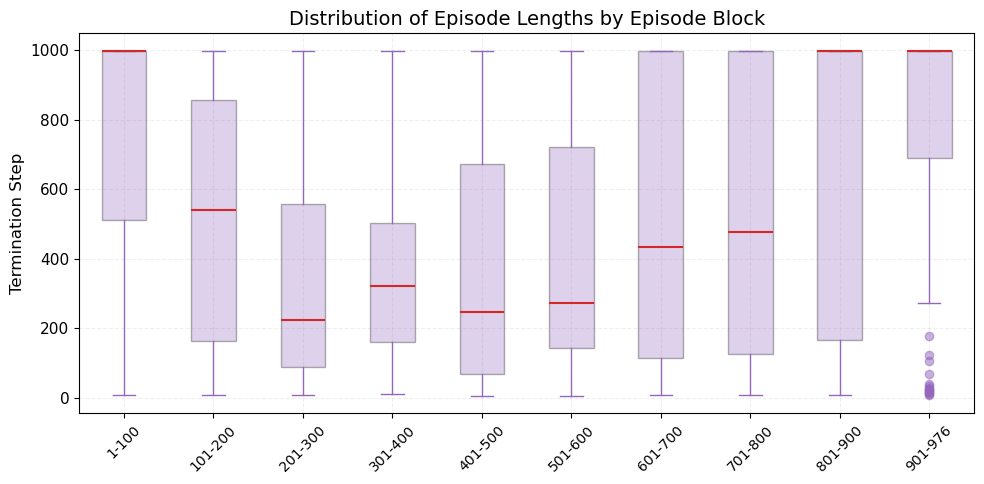

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) episode_lengths (numpy array) 준비되었다고 가정
# ───────────────────────────────────────────────────────────────────

# ───────────────────────────────────────────────────────────────────
# (1) 그룹 크기 설정: 예를 들어 100개씩 묶어서 박스플롯
# ───────────────────────────────────────────────────────────────────
group_size = 100
num_groups = int(np.ceil(len(episode_lengths) / group_size))

groups = []
labels = []
for g in range(num_groups):
    start = g * group_size
    end = min((g + 1) * group_size, len(episode_lengths))
    group_data = episode_lengths[start:end]
    groups.append(group_data)
    labels.append(f'{start+1}-{end}')  # ex) '1-100', '101-200', …

# ───────────────────────────────────────────────────────────────────
# (2) 박스플롯 그리기
# ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 5))
plt.boxplot(
    groups,
    labels=labels,
    patch_artist=True,
    boxprops={'facecolor':'tab:purple', 'alpha':0.3},
    medianprops={'color':'tab:red', 'linewidth':1.5},
    whiskerprops={'color':'tab:purple', 'linewidth':1.0},
    capprops={'color':'tab:purple', 'linewidth':1.0},
    flierprops={'markeredgecolor':'tab:purple', 'markerfacecolor':'tab:purple', 'alpha':0.5}
)

# ───────────────────────────────────────────────────────────────────
# (3) 축/제목/레이블 설정
# ───────────────────────────────────────────────────────────────────
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Termination Step', fontsize=12)
plt.title('Distribution of Episode Lengths by Episode Block', fontsize=14)
plt.grid(alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()


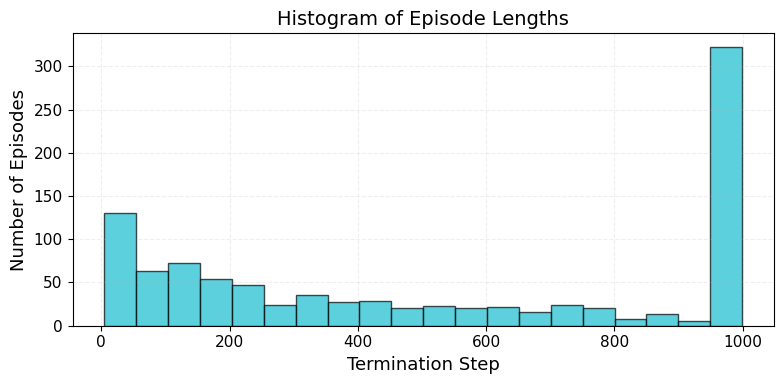

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) episode_lengths 준비됨
# ───────────────────────────────────────────────────────────────────

plt.figure(figsize=(8, 4))

# 예: 20개 구간(bin)으로 히스토그램
plt.hist(
    episode_lengths,
    bins=20,
    color='tab:cyan',
    edgecolor='black',
    alpha=0.7
)

plt.xlabel('Termination Step')
plt.ylabel('Number of Episodes')
plt.title('Histogram of Episode Lengths')
plt.grid(alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()


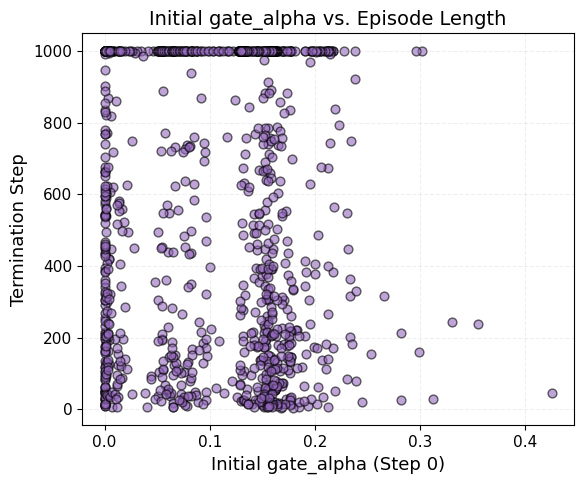

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) all_gate_alpha, episode_lengths 준비됨
#    – 여기서는 각 에피소드의 첫 스텝(인덱스 0) gate_alpha를 사용한다고 가정
# ───────────────────────────────────────────────────────────────────

initial_gate_alpha = np.array([
    ep[0] if len(ep) > 0 else 0.0
    for ep in all_gate_alpha
])
# 또는 “에피소드 전체 평균” 대신 “첫 10 스텝 평균 gate_alpha”를 사용하려면:
# initial_gate_alpha = np.array([np.mean(ep[:10]) for ep in all_gate_alpha])

plt.figure(figsize=(6, 5))
plt.scatter(
    initial_gate_alpha,
    episode_lengths,
    color='tab:purple',  # 'tab:magenta' 대신 유효한 색상으로 변경
    alpha=0.6,
    s=40,
    edgecolors='black'
)

plt.xlabel('Initial gate_alpha (Step 0)')
plt.ylabel('Termination Step')
plt.title('Initial gate_alpha vs. Episode Length')
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()


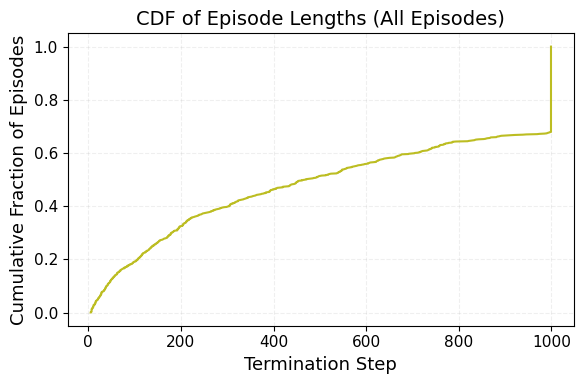

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) episode_lengths 준비됨
# ───────────────────────────────────────────────────────────────────

# (1) 모든 에피소드 길이를 정렬해서 누적분포(CDF) 한번 그려보기
sorted_lengths = np.sort(episode_lengths)
cdf = np.arange(1, len(sorted_lengths)+1) / len(sorted_lengths)

plt.figure(figsize=(6, 4))
plt.plot(sorted_lengths, cdf, color='tab:olive', linewidth=1.5)
plt.xlabel('Termination Step')
plt.ylabel('Cumulative Fraction of Episodes')
plt.title('CDF of Episode Lengths (All Episodes)')
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

# (2) 시계열 관점에서 “횟수별 누적 분포”를 보고 싶다면,
#     예를 들어 200번째 에피소드까지의 분포 vs. 400번째 에피소드까지의 분포를 비교하는 식
#     애니메이션이나 subplot으로 여러 시점을 비교해도 됨.


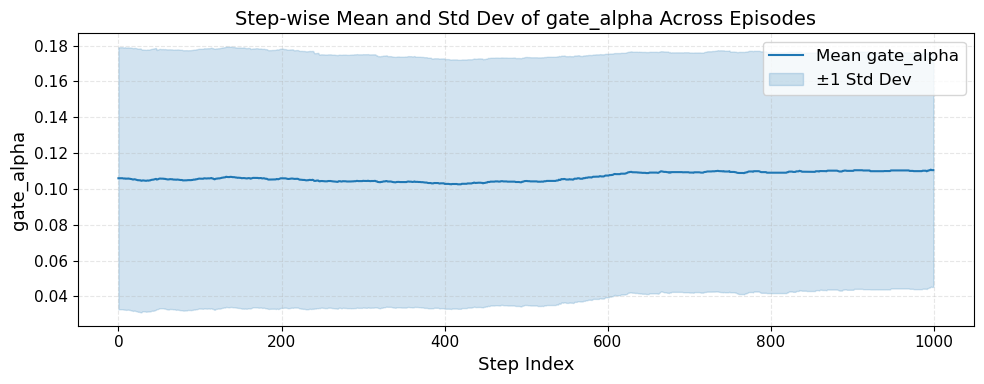

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 2D 배열:
#    gate_matrix (shape = [num_episodes, max_len], NaN 포함)
#    – 위의 스텝별 평균을 구할 때 만들었던 gate_matrix를 그대로 사용
# ───────────────────────────────────────────────────────────────────

# 1) 스텝별 표준편차 계산 (NaN 무시)
std_gate_per_step = np.nanstd(gate_matrix, axis=0)  # shape = (max_len,)

# 2) 시각화: 스텝별 평균 + ±1 표준편차 음영 영역
mean_gate_per_step = np.nanmean(gate_matrix, axis=0)  # 이미 계산한 값

x_axis = np.arange(gate_matrix.shape[1])

plt.figure(figsize=(10, 4))
plt.plot(
    x_axis,
    mean_gate_per_step,
    color='tab:blue',
    linewidth=1.5,
    label='Mean gate_alpha'
)
# ±1 sigma 음영
plt.fill_between(
    x_axis,
    mean_gate_per_step - std_gate_per_step,
    mean_gate_per_step + std_gate_per_step,
    color='tab:blue',
    alpha=0.2,
    label='±1 Std Dev'
)

plt.xlabel('Step Index')
plt.ylabel('gate_alpha')
plt.title('Step-wise Mean and Std Dev of gate_alpha Across Episodes')
plt.legend(loc='upper right')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


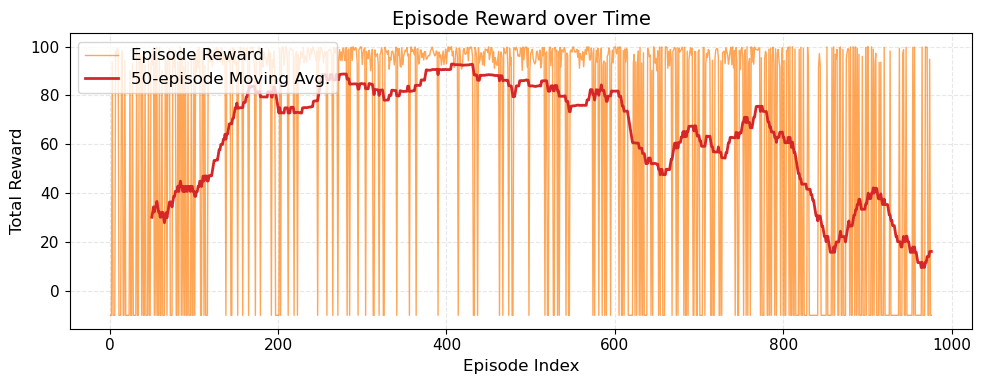

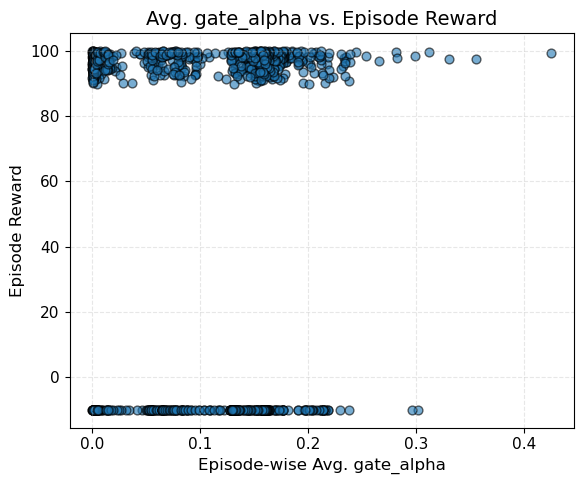

In [32]:
# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터:
#    all_terminated: List[List[int]] 형태
#    (예: all_terminated[i] = [0,0,0,1, …] → i번째 에피소드가 step index 3에서 목표에 도달)
# ───────────────────────────────────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt

# 예시: all_terminated 변수는 이미 메모리에 로드된 상태라 가정
# all_terminated = [
#     [0,0,1],        # 에피소드1: step 2(0-based)에서 terminated
#     [0,0,0,0,...],  # 에피소드2: terminated 없이 1000스텝까지 버텼음
#     [0,1],          # 에피소드3: step 1에서 terminated
#     ...
# ]

episode_rewards = []
termination_steps = []  # (디버깅/참고용) 각 에피소드 종료 스텝(0-based)

for term_list in all_terminated:
    if np.any(term_list):  
        # terminated==1이 존재하면, 그 첫 등장 위치(인덱스 k)를 구함
        k = int(np.argmax(term_list))
        termination_steps.append(k)
        # k번째 스텝까지 총 (k+1)번의 스텝을 밟았으므로 페널티 = (k+1)*(-0.01)
        # 목표 도달 보너스 +100
        ep_reward = (k + 1) * (-0.01) + 100.0
    else:
        # terminated==1이 하나도 없으면, len(term_list) 스텝(=1000)까지 버틴 것
        # 본 예시는 모두 max-step=1000이라고 가정
        L = len(term_list)
        termination_steps.append(L - 1)
        ep_reward = L * (-0.01)  # +100은 없으므로 패널티만
    episode_rewards.append(ep_reward)

episode_rewards = np.array(episode_rewards)
termination_steps = np.array(termination_steps)

# ───────────────────────────────────────────────────────────────────
# 1) 에피소드별 총 보상(episode reward) 시각화
# ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.plot(
    np.arange(1, len(episode_rewards) + 1),
    episode_rewards,
    color='tab:orange',
    linewidth=1.0,
    alpha=0.7,
    label='Episode Reward'
)

# (선택) 50-episode 이동평균(Moving Average) 추가
window_size = 50
if len(episode_rewards) >= window_size:
    weights = np.ones(window_size) / window_size
    smooth_rewards = np.convolve(episode_rewards, weights, mode='valid')
    plt.plot(
        np.arange(window_size, len(episode_rewards) + 1),
        smooth_rewards,
        color='tab:red',
        linewidth=2.0,
        label=f'{window_size}-episode Moving Avg.'
    )

plt.xlabel('Episode Index', fontsize=12)
plt.ylabel('Total Reward', fontsize=12)
plt.title('Episode Reward over Time', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────
# 2) 에피소드별 평균 gate_alpha vs. 계산된 episode reward 산점도
# ───────────────────────────────────────────────────────────────────
# all_gate_alpha[i]는 i번째 에피소드의 gate_alpha 리스트 → 평균을 계산
avg_alpha_per_ep = np.array([np.mean(ep) for ep in all_gate_alpha])

plt.figure(figsize=(6, 5))
plt.scatter(
    avg_alpha_per_ep,
    episode_rewards,
    color='tab:blue',
    alpha=0.6,
    s=40,
    edgecolors='black'
)
plt.xlabel('Episode-wise Avg. gate_alpha', fontsize=12)
plt.ylabel('Episode Reward', fontsize=12)
plt.title('Avg. gate_alpha vs. Episode Reward', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


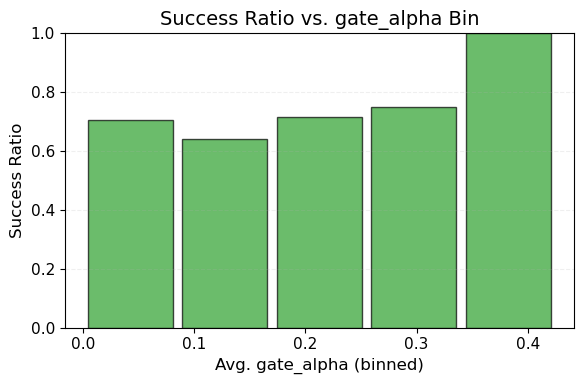

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 단계1) 성공 여부 배열 생성: 성공(terminated 중 1이 하나라도 있으면 1), 아니면 0
success_per_ep = np.array([1 if np.any(ep) else 0 for ep in all_terminated])

# 단계2) avg_alpha_per_ep, success_per_ep 준비됨 (길이가 같음)
# 단계3) gate_alpha 범위를 예: 5개 구간으로 분할
num_bins = 5
bins = np.linspace(np.min(avg_alpha_per_ep), np.max(avg_alpha_per_ep), num_bins+1)

# 각 bin마다 성공률 계산
bin_indices = np.digitize(avg_alpha_per_ep, bins)  # 각 에피소드가 속한 bin 인덱스 (1 ~ num_bins)

success_ratios = []
bin_centers   = []

for b in range(1, num_bins+1):
    idx = np.where(bin_indices == b)[0]  # b번 bin에 해당하는 에피소드 인덱스
    if len(idx) == 0:
        success_ratios.append(np.nan)
    else:
        # 해당 bin에서 성공한 에피소드 비율 = success_per_ep[idx].mean()
        success_ratios.append(np.mean(success_per_ep[idx]))
    # bin 중심값 계산
    bin_centers.append((bins[b-1] + bins[b]) / 2)

# 막대그래프 그리기
plt.figure(figsize=(6,4))
plt.bar(
    bin_centers,
    success_ratios,
    width=(bins[1]-bins[0])*0.9,  # 약간 빈틈 주기
    color='tab:green',
    alpha=0.7,
    edgecolor='black'
)
plt.xlabel('Avg. gate_alpha (binned)', fontsize=12)
plt.ylabel('Success Ratio', fontsize=12)
plt.title('Success Ratio vs. gate_alpha Bin', fontsize=14)
plt.ylim(0, 1.0)
plt.grid(alpha=0.2, linestyle='--', axis='y')
plt.tight_layout()
plt.show()


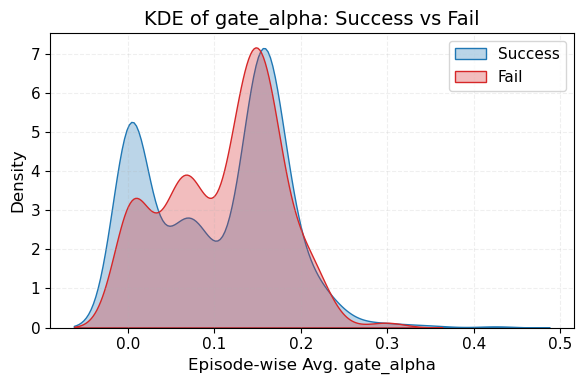

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn 설치되어 있다면 더 간단

# 성공(avg)과 실패(avg) 구분
alphas_success = avg_alpha_per_ep[ success_per_ep == 1 ]
alphas_fail    = avg_alpha_per_ep[ success_per_ep == 0 ]

plt.figure(figsize=(6,4))
# seaborn을 사용한 KDE 예시
sns.kdeplot(alphas_success, label='Success', color='tab:blue', fill=True, alpha=0.3)
sns.kdeplot(alphas_fail,    label='Fail',    color='tab:red',  fill=True, alpha=0.3)

plt.xlabel('Episode-wise Avg. gate_alpha', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('KDE of gate_alpha: Success vs Fail', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()


/tmp/ipykernel_207276/2015204510.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


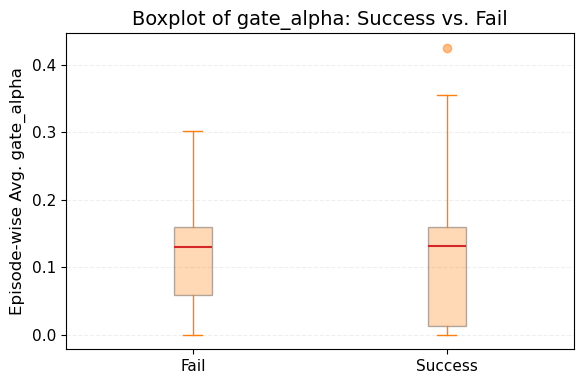

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 성공과 실패 그룹 분리 (위와 동일)
alphas_success = avg_alpha_per_ep[ success_per_ep == 1 ]
alphas_fail    = avg_alpha_per_ep[ success_per_ep == 0 ]

data = [alphas_fail, alphas_success]
labels = ['Fail', 'Success']

plt.figure(figsize=(6,4))
plt.boxplot(
    data,
    labels=labels,
    patch_artist=True,
    boxprops={'facecolor':'tab:orange', 'alpha':0.3},
    medianprops={'color':'tab:red', 'linewidth':1.5},
    whiskerprops={'color':'tab:orange'},
    capprops={'color':'tab:orange'},
    flierprops={'markeredgecolor':'tab:orange', 'markerfacecolor':'tab:orange', 'alpha':0.5}
)
plt.ylabel('Episode-wise Avg. gate_alpha', fontsize=12)
plt.title('Boxplot of gate_alpha: Success vs. Fail', fontsize=14)
plt.grid(alpha=0.2, linestyle='--', axis='y')
plt.tight_layout()
plt.show()


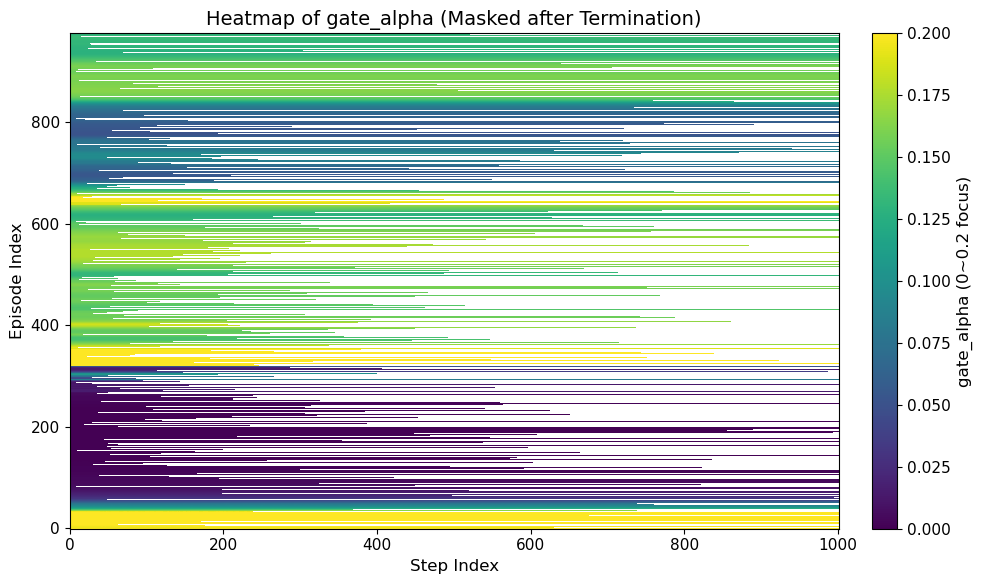

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) 이미 준비된 데이터:
#   - gate_matrix: shape = (num_episodes, max_len) 
#       각 행은 i번째 에피소드의 gate_alpha 시퀀스, 종료 이후 스텝은 NaN 또는 0으로 채웠다고 가정
#   - termination_steps: shape = (num_episodes,)
#       각 에피소드가 최초로 terminated == 1을 기록한 스텝 인덱스 (0-based)
#       만약 terminated==1이 없는 에피소드라면, 예: len_of_episode - 1(=999) 로 설정
# ───────────────────────────────────────────────────────────────────

# 예시: 만약 아직 termination_steps가 없다면, 아래처럼 만들어 주세요.
# termination_steps = []
# for term_list in all_terminated:
#     if np.any(term_list):
#         k = int(np.argmax(term_list))
#     else:
#         k = len(term_list) - 1
#     termination_steps.append(k)
# termination_steps = np.array(termination_steps)

num_episodes, max_len = gate_matrix.shape

# ───────────────────────────────────────────────────────────────────
# (1) MaskedArray 생성: 
#    i번째 행의 j번째 컬럼이 “j > termination_steps[i]” 이면 mask=True
# ───────────────────────────────────────────────────────────────────
masked = np.zeros_like(gate_matrix, dtype=bool)  # False: 보임, True: 감추기
for i in range(num_episodes):
    term = termination_steps[i]
    # term 이후(즉, term+1부터 끝)까지 마스킹
    if term + 1 < max_len:
        masked[i, term+1:] = True

# MaskedArray: 데이터를 그대로 쓰되, masked=True인 부분은 그리지 않음
gate_masked = np.ma.MaskedArray(gate_matrix, mask=masked)

# ───────────────────────────────────────────────────────────────────
# (2) 각 에피소드별로 “종료 시점 이전, 즉 실제로 데이터가 존재하는 영역”만 그리기 위해 
#     x축 한계를 전체 종전 스텝의 최대값으로 설정
# ───────────────────────────────────────────────────────────────────
max_term = int(np.max(termination_steps))  # 전체 에피소드 중 제일 늦게 종료된 스텝
# 예: max_term이 450이라면, x축을 0~450까지만 보여 줌

# ───────────────────────────────────────────────────────────────────
# (3) 히트맵 그리기
# ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6))
im = plt.imshow(
    gate_masked,
    aspect='auto',
    origin='lower',
    cmap='viridis',  # 혹은 'plasma', 'cividis' 등 시인성 좋은 컬러맵
    vmin=0.0,
    vmax=0.2,       # 0~0.2 범위만 색상 강조(나머지는 연한 색이나 흰색으로 비워짐)
    interpolation='nearest'
)

# 컬러바 추가
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('gate_alpha (0~0.2 focus)', fontsize=12)

# x축/ y축 라벨과 제목
plt.xlabel('Step Index', fontsize=12)
plt.ylabel('Episode Index', fontsize=12)
plt.title('Heatmap of gate_alpha (Masked after Termination)', fontsize=14)

# x축 범위를 실제 종료 시점까지만 보이도록 조정 (약간 여유 두려면 +1~+2)
plt.xlim(0, max_term + 2)

plt.tight_layout()
plt.show()


/tmp/ipykernel_207276/777393721.py:41: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(term, offset_i, s=6, color='tab:red',  marker='x', edgecolors='none')
/tmp/ipykernel_207276/777393721.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1.0])  # 오른쪽 컬러바 공간 확보


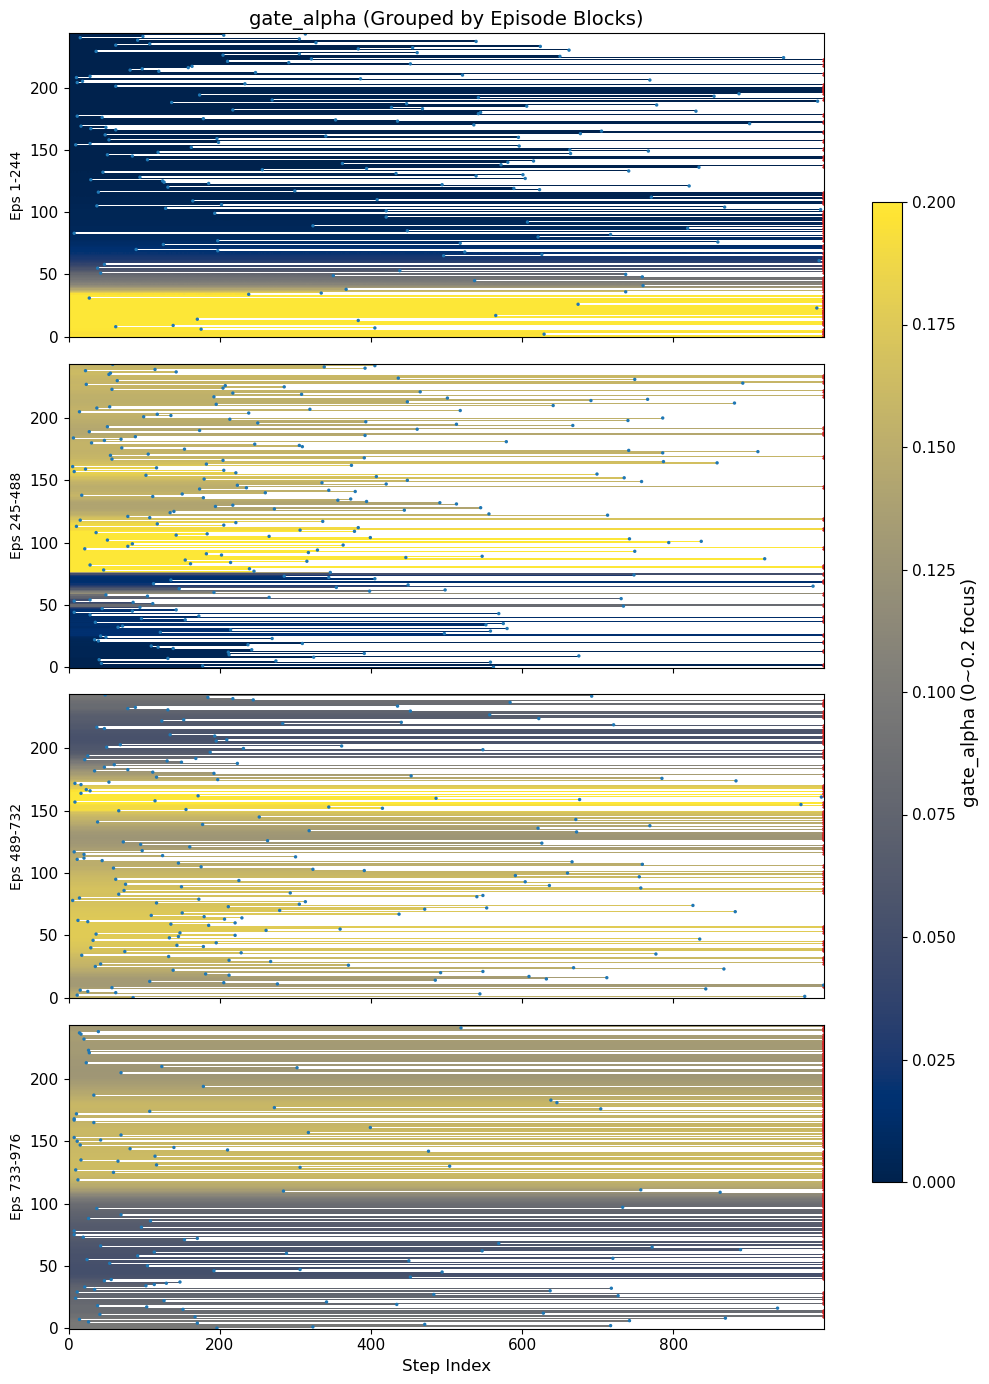

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────
# (A) gate_masked, termination_steps, success_per_ep, max_term 준비됨
# ───────────────────────────────────────────────────────────────────

num_plots = 4
eps_per_plot = num_episodes // num_plots  # 예: 1000/4 = 250씩

fig, axes = plt.subplots(
    nrows=num_plots, 
    ncols=1, 
    figsize=(10, 3.5 * num_plots), 
    sharex=True
)

for k in range(num_plots):
    start = k * eps_per_plot
    end   = start + eps_per_plot if k < num_plots - 1 else num_episodes
    sub_masked = gate_masked[start:end, :]
    sub_success = success_per_ep[start:end]
    sub_term    = termination_steps[start:end]

    ax = axes[k]
    im = ax.imshow(
        sub_masked,
        aspect='auto',
        origin='lower',
        cmap='cividis',
        vmin=0.0,
        vmax=0.2,
        interpolation='nearest'
    )
    # 종료 시점을 점으로 표시 (파란=성공, 빨간=실패)
    for offset_i, (suc, term) in enumerate(zip(sub_success, sub_term)):
        i_global = start + offset_i  # 전체 에피소드 인덱스
        if suc == 1:
            ax.scatter(term, offset_i, s=6, color='tab:blue', marker='o', edgecolors='none')
        else:
            ax.scatter(term, offset_i, s=6, color='tab:red',  marker='x', edgecolors='none')

    ax.set_ylabel(f'Eps {start+1}-{end}', fontsize=10)
    if k == 0:
        ax.set_title('gate_alpha (Grouped by Episode Blocks)', fontsize=14)

# 컬러바: 가장 하단 서브플롯에 붙이기
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='gate_alpha (0~0.2 focus)')

axes[-1].set_xlabel('Step Index', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1.0])  # 오른쪽 컬러바 공간 확보
plt.show()
